Kelompok 3:


*   Agatha Ulina Silalahi - 2306288875
*   Arya Wira Syahdwinata - 2306174892
*   Mastika - 2306174974
*   M. Ramzan - 23062000953
*   Yosua Walfried - 2306175005


# Preprocessing data rekam medis covid.
---

Data diambil dari rekam medis covid secara manual, data rekam medis dibuat tabular dengan nilai-nilai yang diambil adalah sebagai berikut:
1. NRM (Nomor Rekam medis)
2. USIA
3. MRS (Tanggal masuk rumah sakit)
4. COV_STATUS (Dilihat dari Anamnes dan Swab PCR)
5. DPL
6. DC
7. ROOM_TYPE (ICU, HCU dan reguler)
8. DATA (Nama ruangan atau Nama Sheet data tersebut diambil)

---

Data tabular disimpan dalam excel dan siap di proses menggunakan python.
Pertama-tama, import data excel menggunakan gdown.

In [ ]:
import pandas as pd
import numpy as np
import gdown

url = "https://drive.google.com/uc?id=1C27Ky1kmosQqX8_0ivPDot_WNqkx3mVl"
output_file = "Data_Medrek_Covid_Kel3.xlsx.csv"
gdown.download(url, output_file)

Downloading...
From: https://drive.google.com/uc?id=1C27Ky1kmosQqX8_0ivPDot_WNqkx3mVl
To: /content/Data_Medrek_Covid_Kel3.xlsx.csv
100%|██████████| 1.03M/1.03M [00:00<00:00, 75.6MB/s]


'Data_Medrek_Covid_Kel3.xlsx.csv'

Baca data excel dan ubah menjadi dataframe, lalu lihat info dari dataframe.

In [ ]:
df = pd.read_excel(output_file)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Room_Type   118 non-null    object        
 1   NRM         123 non-null    float64       
 2   USIA        122 non-null    float64       
 3   MRS         117 non-null    datetime64[ns]
 4   COV_STATUS  124 non-null    object        
 5   DATA        111 non-null    object        
 6   DPL_1       126 non-null    object        
 7   DPL_2       63 non-null     object        
 8   DPL_3       31 non-null     object        
 9   DPL_4       13 non-null     object        
 10  DPL_5       4 non-null      object        
 11  DC_1        107 non-null    object        
 12  DC_2        50 non-null     object        
 13  DC_3        24 non-null     object        
 14  DC_4        12 non-null     object        
 15  DC_5        3 non-null      object        
dtypes: datetime64[ns](1), floa

,Room_Type,NRM,USIA,MRS,COV_STATUS,DATA,DPL_1,DPL_2,DPL_3,DPL_4,DPL_5,DC_1,DC_2,DC_3,DC_4,DC_5
0,NaN,4495809.0,25.0,2020-09-28,Confirmed,NaN,13.7/42.2/5400/331.000,NaN,NaN,NaN,NaN,0.2/0/71.6/20.2/8,NaN,NaN,NaN,NaN
1,NaN,3386524.0,49.0,2020-08-05,Suspect,NaN,13/40/7680/300.000,NaN,NaN,NaN,NaN,0/0/72/20/6,NaN,NaN,NaN,NaN
2,Regular,4494432.0,22.0,2020-08-21,Suspect,612,10/32/11900/302000,NaN,NaN,NaN,NaN,0.3/0.3/75/15/8,NaN,NaN,NaN,NaN
3,Regular,4260019.0,57.0,2020-04-08,Suspect,601A,9.2/25.4/2650/50000,8.5/23.3/1640/47000,8.6/24.7/3290/60000,9.4/26.4/6.580/74.000,NaN,0/1/68/17/11,0/2/55/24/17,0/1.2/68.1/14.3/16.4,0.3/0.3/76.8/10.9/11.7,NaN
4,NaN,4455946.0,61.0,2020-05-19,Non,NaN,11.8/35.3/9180/434000,NaN,NaN,NaN,NaN,0.2/4.9/74.2/11.9/8.8,NaN,NaN,NaN,NaN


Data NRM yang seharusnya merupakan text dibaca numerik. Lalu data DPL dan DC terbaca text karena dalam 1 entri terdapat beberapa sub entri. Berdasarkan perkiraan nilai normal DPL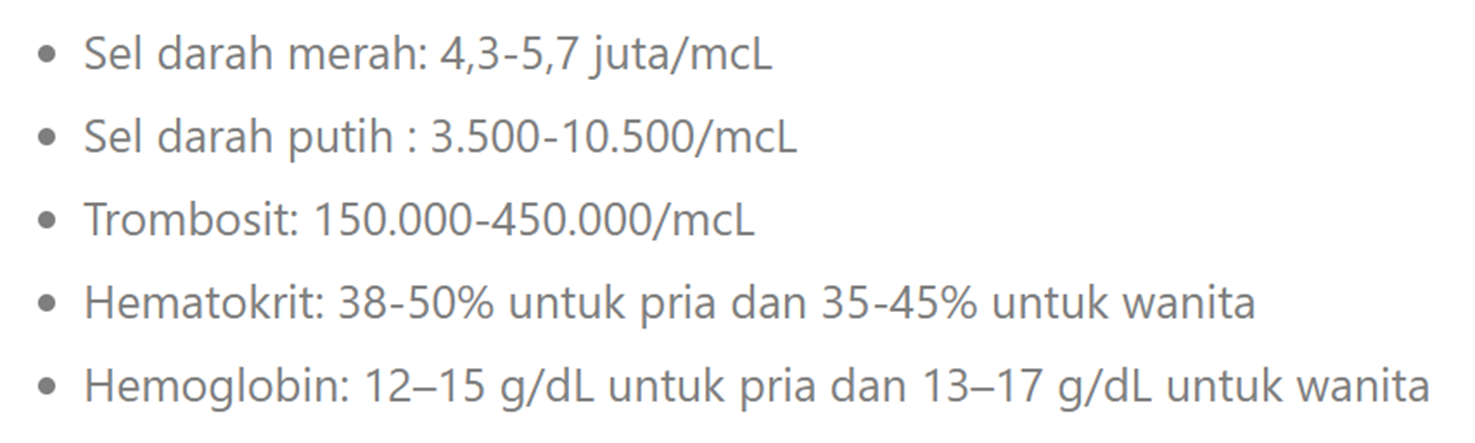 dan DC: 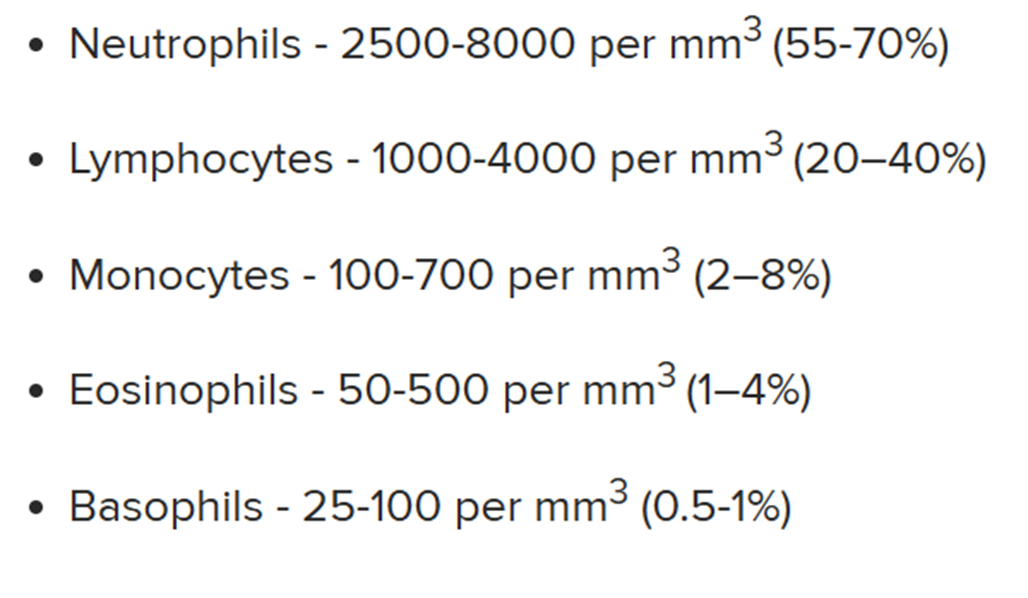

Nilai DPL Sebagai berikut:
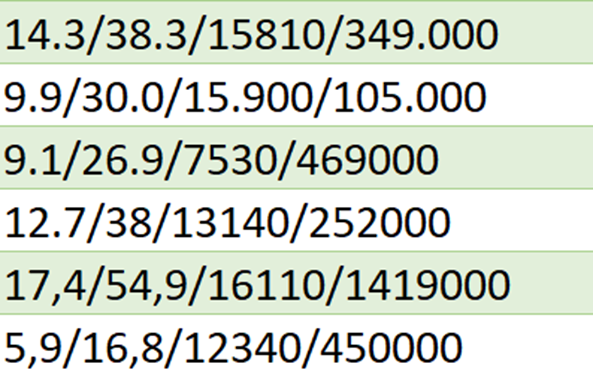
Dan DC Sebagai berikut:
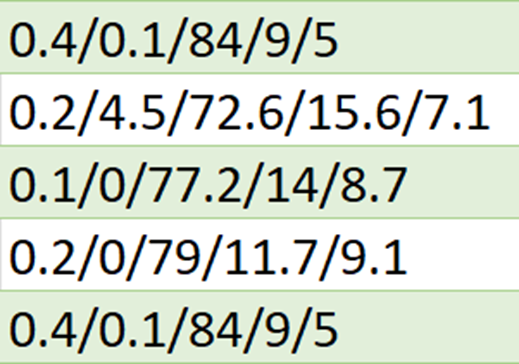

Didefinisikan menjadi berikut:


1.   DPL

Hemoglobin/Hematokrit/Leukosit/Trombosit

2.   DC

Basofil/Eosinofil/Neutrofil/Limfosit/Monosit

Sub entri tersebut perlu dilakukan pemecahan menjadi kolom kolom baru dengan penamaan (JENIS_PEMERIKSAAN)_X.


In [ ]:
import pandas as pd

# Define the new column names for DPL and DC columns
dpl_columns = ['Hemoglobin', 'Hematokrit', 'Leukosit', 'Trombosit']
dc_columns = ['Basofil', 'Eosinofil', 'Neutrofil', 'Limfosit', 'Monosit']

# Iterate over the DPL and DC columns
for i in range(1, 6):
    # Split the DPL columns
    dpl_df = df[f'DPL_{i}'].str.split('/', expand=True)
    dpl_df.columns = [f'{col}_{i}' for col in dpl_columns]
    df = pd.concat([df, dpl_df], axis=1)

    # Split the DC columns
    dc_df = df[f'DC_{i}'].str.split('/', expand=True)
    dc_df.columns = [f'{col}_{i}' for col in dc_columns]
    df = pd.concat([df, dc_df], axis=1)

# Print the updated DataFrame
print(df)

    Room_Type        NRM  USIA        MRS COV_STATUS   DATA  \
0         NaN  4495809.0  25.0 2020-09-28  Confirmed    NaN   
1         NaN  3386524.0  49.0 2020-08-05    Suspect    NaN   
2     Regular  4494432.0  22.0 2020-08-21    Suspect    612   
3     Regular  4260019.0  57.0 2020-04-08    Suspect   601A   
4         NaN  4455946.0  61.0 2020-05-19        Non    NaN   
..        ...        ...   ...        ...        ...    ...   
121   Regular  4489280.0  43.0 2020-11-19  Confirmed  606 D   
122   Regular  4498644.0  52.0 2020-10-27  Confirmed  606 E   
123   Regular  4500335.0  50.0        NaT  Confirmed  608 C   
124   Regular  4500492.0  32.0 2020-11-21  Confirmed  609 B   
125   Regular  4388577.0  56.0 2020-09-09  Confirmed    609   

                        DPL_1                    DPL_2  \
0      13.7/42.2/5400/331.000                      NaN   
1          13/40/7680/300.000                      NaN   
2          10/32/11900/302000                      NaN   
3         9

Setelah hasil pemeriksaan DPL dan DC dipecah berdasarkan jenis pemeriksaannya, perlu dilakukan pengkategorisasian data hasil lab berdasarkan rentang nilai normal menjadi "Low", "Normal" dan "High". Akan tetapi data perlu dibersihkan kembali menggunakan excel (agar lebih
cepat). Hal-hal yang perlu dibersihkan pada data dapat dilihat di laporan. Maka, data diubah kembali menggunakan Excel

In [ ]:
df.to_excel("Data_Medrek_Cleaned.xlsx", index=False)

Setelah data dibersihkan dengan menggunakan excel. maka dilakukan pengkategorisasian untuk setiap hasil lab menggunakan penamaan CAT_"Jenis Pemeriksaan"_X. Pertama, akan dibaca data excel menjadi dataframe

In [ ]:
url = "https://drive.google.com/uc?id=1DliqzmqM0F6Lp37CwmyAu8gww2cuOB9T"
output_file = "Data_Medrek_Cleaned.csv"
gdown.download(url, output_file)

Downloading...
From: https://drive.google.com/uc?id=1DliqzmqM0F6Lp37CwmyAu8gww2cuOB9T
To: /content/Data_Medrek_Cleaned.csv
100%|██████████| 25.5k/25.5k [00:00<00:00, 39.2MB/s]


'Data_Medrek_Cleaned.csv'

In [ ]:
df1 = pd.read_excel(output_file)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Room_Type     118 non-null    object        
 1   NRM           123 non-null    float64       
 2   USIA          122 non-null    float64       
 3   MRS           117 non-null    datetime64[ns]
 4   COV_STATUS    124 non-null    object        
 5   DATA          111 non-null    object        
 6   Hemoglobin_1  125 non-null    float64       
 7   Hematokrit_1  126 non-null    float64       
 8   Leukosit_1    126 non-null    int64         
 9   Trombosit_1   126 non-null    int64         
 10  Basofil_1     107 non-null    float64       
 11  Eosinofil_1   107 non-null    float64       
 12  Neutrofil_1   107 non-null    float64       
 13  Limfosit_1    107 non-null    float64       
 14  Monosit_1     107 non-null    float64       
 15  Hemoglobin_2  63 non-null     float64   

,Room_Type,NRM,USIA,MRS,COV_STATUS,DATA,Hemoglobin_1,Hematokrit_1,Leukosit_1,Trombosit_1,...,Monosit_4,Hemoglobin_5,Hematokrit_5,Leukosit_5,Trombosit_5,Basofil_5,Eosinofil_5,Neutrofil_5,Limfosit_5,Monosit_5
0,NaN,4495809.0,25.0,2020-09-28,Confirmed,NaN,13.7,42.2,5400,331000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3386524.0,49.0,2020-08-05,Suspect,NaN,13.0,40.0,7680,300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Regular,4494432.0,22.0,2020-08-21,Suspect,612,10.0,32.0,11900,302000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Regular,4260019.0,57.0,2020-04-08,Suspect,601A,9.2,25.4,2650,50000,...,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4455946.0,61.0,2020-05-19,Non,NaN,11.8,35.3,9180,434000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Leukosit_1 dan Trombosit_1 masih dalam tipe integer, NRM juga masih dalam tipe numerik. maka akan dilakukan penyeragaman tipe data terlebih dahulu agar hasil lab menjadi float dan numerik menjadi string.

In [ ]:
# Change "Leukosit_1" and "Trombosit_1" into float64
df1["Leukosit_1"] = df1["Leukosit_1"].astype('float64')
df1["Trombosit_1"] = df1["Trombosit_1"].astype('float64')

# Change "NRM" into object (string)
df1["NRM"] = df1["NRM"].astype('object')

Lalu tambahkan kolom kategorik untuk masing-masing jenis pemeriksaan, kecuali untuk hematokrit dan hemoglobin. karena tidak ada informasi jenis kelamin pada data dan kedua data tersebut nilai normalnya berdasarkan jenis kelamin.

In [ ]:
def categorize(value, low, high):
    if pd.isnull(value):
        return None  # or return your specific value
    elif value < low:
        return 'Low'
    elif low <= value <= high:
        return 'Normal'
    else:
        return 'High'

# Define the normal ranges for each column
ranges = {
    'Leukosit': (3500, 10500),
    'Trombosit': (150000, 450000),
    'Basofil': (0.5, 1),
    'Eosinofil': (1, 4),
    'Neutrofil': (55, 70),
    'Limfosit': (20, 40),
    'Monosit': (2, 8)
}

# Apply the function to each column
for name, (low, high) in ranges.items():
    for i in range(1, 6):
        column_name = f'{name}_{i}'
        df1[f'CAT_{name}_{i}'] = df1[column_name].apply(lambda x: categorize(x, low, high))

Menambahkan Kolom MRS_MONTH berdasarkan MRS

In [ ]:
df1['MRS_MONTH'] = df1['MRS'].dt.strftime('%B')

Cek baris duplikat pada data berdasarkan NRM dan MRS (2 data dengan nomor rekam medis sama yang masuk rumah sakit pada hari yang sama bisa dipastikan data duplikat)

In [ ]:
duplicates = df1[df1.duplicated(subset=['NRM', 'MRS'], keep=False)]

# Print the duplicates
print(duplicates)

    Room_Type        NRM  USIA        MRS COV_STATUS  \
6         NaN        NaN   NaN        NaT        NaN   
7     Regular  4456137.0  58.0 2020-04-14    Suspect   
11    Regular  4456137.0  58.0 2020-04-14    Suspect   
52    Regular  4498865.0  31.0 2020-10-19    Suspect   
55        HCU  3452921.0  95.0 2020-06-22  Confirmed   
59        HCU        NaN  77.0        NaT    Suspect   
70    Regular  3452921.0  95.0 2020-06-22  Confirmed   
89        ICU  4457768.0  49.0 2020-05-05        Non   
95        ICU  4457840.0  75.0 2020-05-07    Suspect   
107       ICU  4457768.0  49.0 2020-05-05    Suspect   
110       ICU  4457840.0  75.0 2020-05-07    Suspect   
116   Regular  4498865.0  31.0 2020-10-19    Suspect   

                            DATA  Hemoglobin_1  Hematokrit_1  Leukosit_1  \
6                            NaN          12.0          35.2      7180.0   
7                           605D          10.7          30.0     38490.0   
11                          605D          1

Terdapat 12 duplikat pada data, walaupun entri yang di cek hanyalah entri NRM dan MRS, kebanyakan dari sisa entri lainnya sama. akan tetapi terdapat sedikit perbedaan dimana data duplikat dengan index lebih besar memiliki data lebih lengkap. Hal ini mungkin terjadi jika terdapat dua kali pencatatan rekam medis pada sheet yang berbeda, akan tetapi pencatat terakhir menambahkan informasi lain sehingga data lebih lengkap. Maka data tersebut akan diambil.

In [ ]:
df1.drop_duplicates(subset=['NRM', 'MRS'], keep='last', inplace=True)
df1.shape

(120, 87)

In [ ]:
#Get the final data back into excel
df1.to_excel("Data_Medrek_Cleaned_Final.xlsx", index=False)

Data siap untuk dianalisis dan divisualisasikan. Data dapat di akses di: https://docs.google.com/spreadsheets/d/1Enz6_0sO44IXnVfCci_7jI-vWtYoRHfY/edit?usp=sharing&ouid=111120271140362415542&rtpof=true&sd=true

### Visualisasi Data Rekam Medis Covid
---
Terdapat 3 ide dasar visualisasi berdasarkan tipe datanya:

1. Numerik dan Numerik
2. Numerik dan Kategorik
3. Kategorik dan Kategorik

Pertama-tama. List terlebih dahulu field berdasarkan tipe datanya.

Numerik:


1.   USIA
2.   Hasil Lab
3.   MRS (Time Series)

Kategorik:

1. Room Type
2. Status Covid
3. Bulan MRS
4. Hasil lab kategorik (Low, Normal, High)

Akan dibuat visualisasi berdasarkan list ini.

### Numerik vs Numerik
---
Untuk visualisasi ini, dilakukan pada data Trombosit_1 dan USIA menggunakan scatter plot, lalu data point akan dibedakan berdasarkan status covidnya. Perlu dilakukan Outlier handling pada data trombosit 1 dan drop missing value pada status covid sebelum melakukan visualisasi.

In [ ]:
# Calculate IQR
Q1 = df1['Trombosit_1'].quantile(0.25)
Q3 = df1['Trombosit_1'].quantile(0.75)
IQR = Q3 - Q1

# Define Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify Outliers
outliers = df1[(df1['Trombosit_1'] < lower_bound) | (df1['Trombosit_1'] > upper_bound)]

# Drop Outliers in Trombosit_1
df2 = df1.drop(outliers.index)

In [ ]:
df2 = df2.dropna(subset=['COV_STATUS'])

Melakukan scatter plot, dan memberikan warna pada area berdasarkan nilai normal pada trombosit.

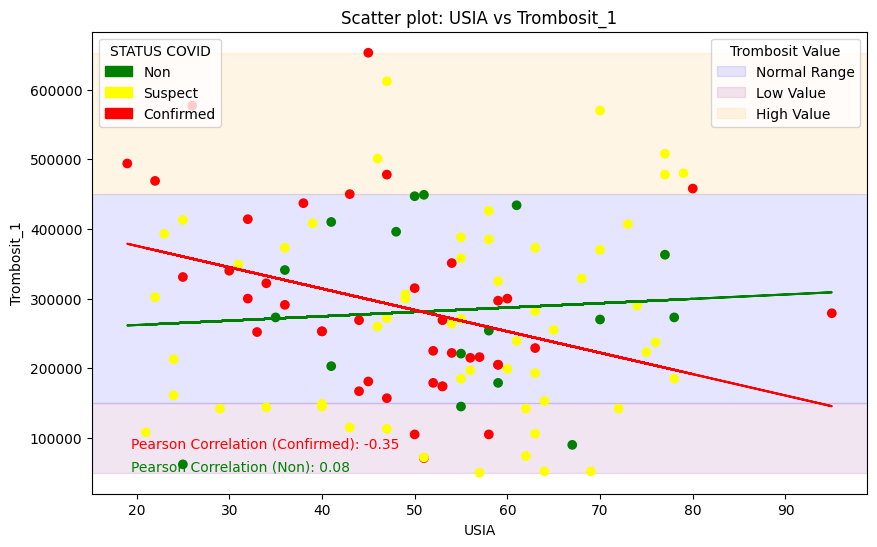

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Drop rows with missing values
df2_clean = df2.dropna(subset=['USIA', 'Trombosit_1'])

# Define colors based on 'COV_STATUS'
colors = df2_clean['COV_STATUS'].map({'Non': 'green', 'Suspect': 'yellow', 'Confirmed': 'red'})

plt.figure(figsize=(10,6))

# Plot the areas
plt.axhspan(150000, 450000, color='blue', alpha=0.1)
plt.axhspan(df2_clean['Trombosit_1'].min(), 150000, color='purple', alpha=0.1)
plt.axhspan(450000, df2_clean['Trombosit_1'].max(), color='orange', alpha=0.1)

# Plot the scatter plot
plt.scatter(df2_clean['USIA'], df2_clean['Trombosit_1'], c=colors)

# Fit linear regression for 'Non' category
non_mask = df2_clean['COV_STATUS'] == 'Non'
non_usia = df2_clean.loc[non_mask, 'USIA'].values.reshape(-1, 1)
non_trombosit = df2_clean.loc[non_mask, 'Trombosit_1'].values
non_model = LinearRegression().fit(non_usia, non_trombosit)
plt.plot(df2_clean['USIA'], non_model.predict(df2_clean['USIA'].values.reshape(-1,1)), color='green')

# Calculate and display Pearson correlation coefficient for 'Non' category
non_corr_coef, _ = pearsonr(df2_clean.loc[non_mask, 'USIA'], df2_clean.loc[non_mask, 'Trombosit_1'])
plt.text(0.05, 0.05, f'Pearson Correlation (Non): {non_corr_coef:.2f}', transform=plt.gca().transAxes, fontsize=10, color='green')

# Fit linear regression for 'Confirmed' category
confirmed_mask = df2_clean['COV_STATUS'] == 'Confirmed'
confirmed_usia = df2_clean.loc[confirmed_mask, 'USIA'].values.reshape(-1, 1)
confirmed_trombosit = df2_clean.loc[confirmed_mask, 'Trombosit_1'].values
confirmed_model = LinearRegression().fit(confirmed_usia, confirmed_trombosit)
plt.plot(df2_clean['USIA'], confirmed_model.predict(df2_clean['USIA'].values.reshape(-1,1)), color='red')

# Calculate and display Pearson correlation coefficient for 'Confirmed' category
confirmed_corr_coef, _ = pearsonr(df2_clean.loc[confirmed_mask, 'USIA'], df2_clean.loc[confirmed_mask, 'Trombosit_1'])
plt.text(0.05, 0.1, f'Pearson Correlation (Confirmed): {confirmed_corr_coef:.2f}', transform=plt.gca().transAxes, fontsize=10, color='red')

# Create legends
legend1 = plt.legend([mpatches.Patch(color='green'), mpatches.Patch(color='yellow'), mpatches.Patch(color='red')], ['Non', 'Suspect', 'Confirmed'], title="STATUS COVID", loc='upper left')
plt.gca().add_artist(legend1)

legend2 = plt.legend([mpatches.Patch(color='blue', alpha=0.1), mpatches.Patch(color='purple', alpha=0.1), mpatches.Patch(color='orange', alpha=0.1)], ['Normal Range', 'Low Value', 'High Value'],title="Trombosit Value", loc='upper right')

plt.title('Scatter plot: USIA vs Trombosit_1')
plt.xlabel('USIA')
plt.ylabel('Trombosit_1')

plt.show()

Disini kita bisa melihat beberapa informasi diantaranya:
1. Status covid "Confirmed" terdapat hingga umur 60an, selebihnya hanya tersisa sedikit.
2. Usia dibawah 30an sedikit yang berstatus covid "Non".
3. Pasien berstatus covid "Non" terkonsentrasi di rentang nilai trombosit normal dan tidak ditemukan pada rentang nilai tinggi, ada indikasi status covid "Non" memiliki nilai trombosit yang normal kebawah.
5. Korelasi ***sangat lemah positif*** (0,08) didapatkan untuk pasien dengan status "Non", yang artinya pasien non covid cenderung memiliki trombosit yang lebih banyak seiring dengan pertambahan umur. (tidak bisa dijadikan acuan karena korelasi sangat lemah)
6. Hal sebaliknya ditemukan untuk pasien dengan status "Confirmed" dimana terdapat korelasi ***lemah negatif*** (-0,35), artinya pasien yang terkonfirmasi covid memiliki trombosit yang lebih sedikit seiring dengan pertambahan umur.

### Numerik vs Kategorik
---
Pada visualisasi jenis ini akan dilakukan analisis apakah terdapat perbedaan distribusi nilai hasil lab (numerik) pada pemeriksaan pertama dan pemeriksaan kedua (kategorik) untuk mengetahui perbaikan kondisi pasian pada kondisi awal masuk perawatan dan setelah menerima perawatan.
Pertanyaan yang perlu dijawab adalah:

1. Apakah pasien dengan kategori nilai "Low" dan "High" pada pemeriksaan pertama, menjadi "Normal" pada pemeriksaan kedua? (Menandakan keberhasilan)
2. Apakah pasien dengan kategori "Normal" pada pemeriksaan pertama, tetap "Normal" pada pemeriksaan kedua? (Menandakan keberhasilan)
3. Apakah pasien dengan kategori "Normal" pada pemeriksaan pertama, menjadi "High" atau "Low" pada pemeriksaan kedua? (Menandakan kegagalan)
4. Apakah pasien dengan kategori nilai "High" dan "Low" pada pemeriksaan pertama, menjadi tetap atau bahkan bertukar kategori pada pemeriksaan kedua? (Menandakan kegagalan)

<ipython-input-57-80a7b7b4e3a6>:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['First Observation', 'Second Observation'])


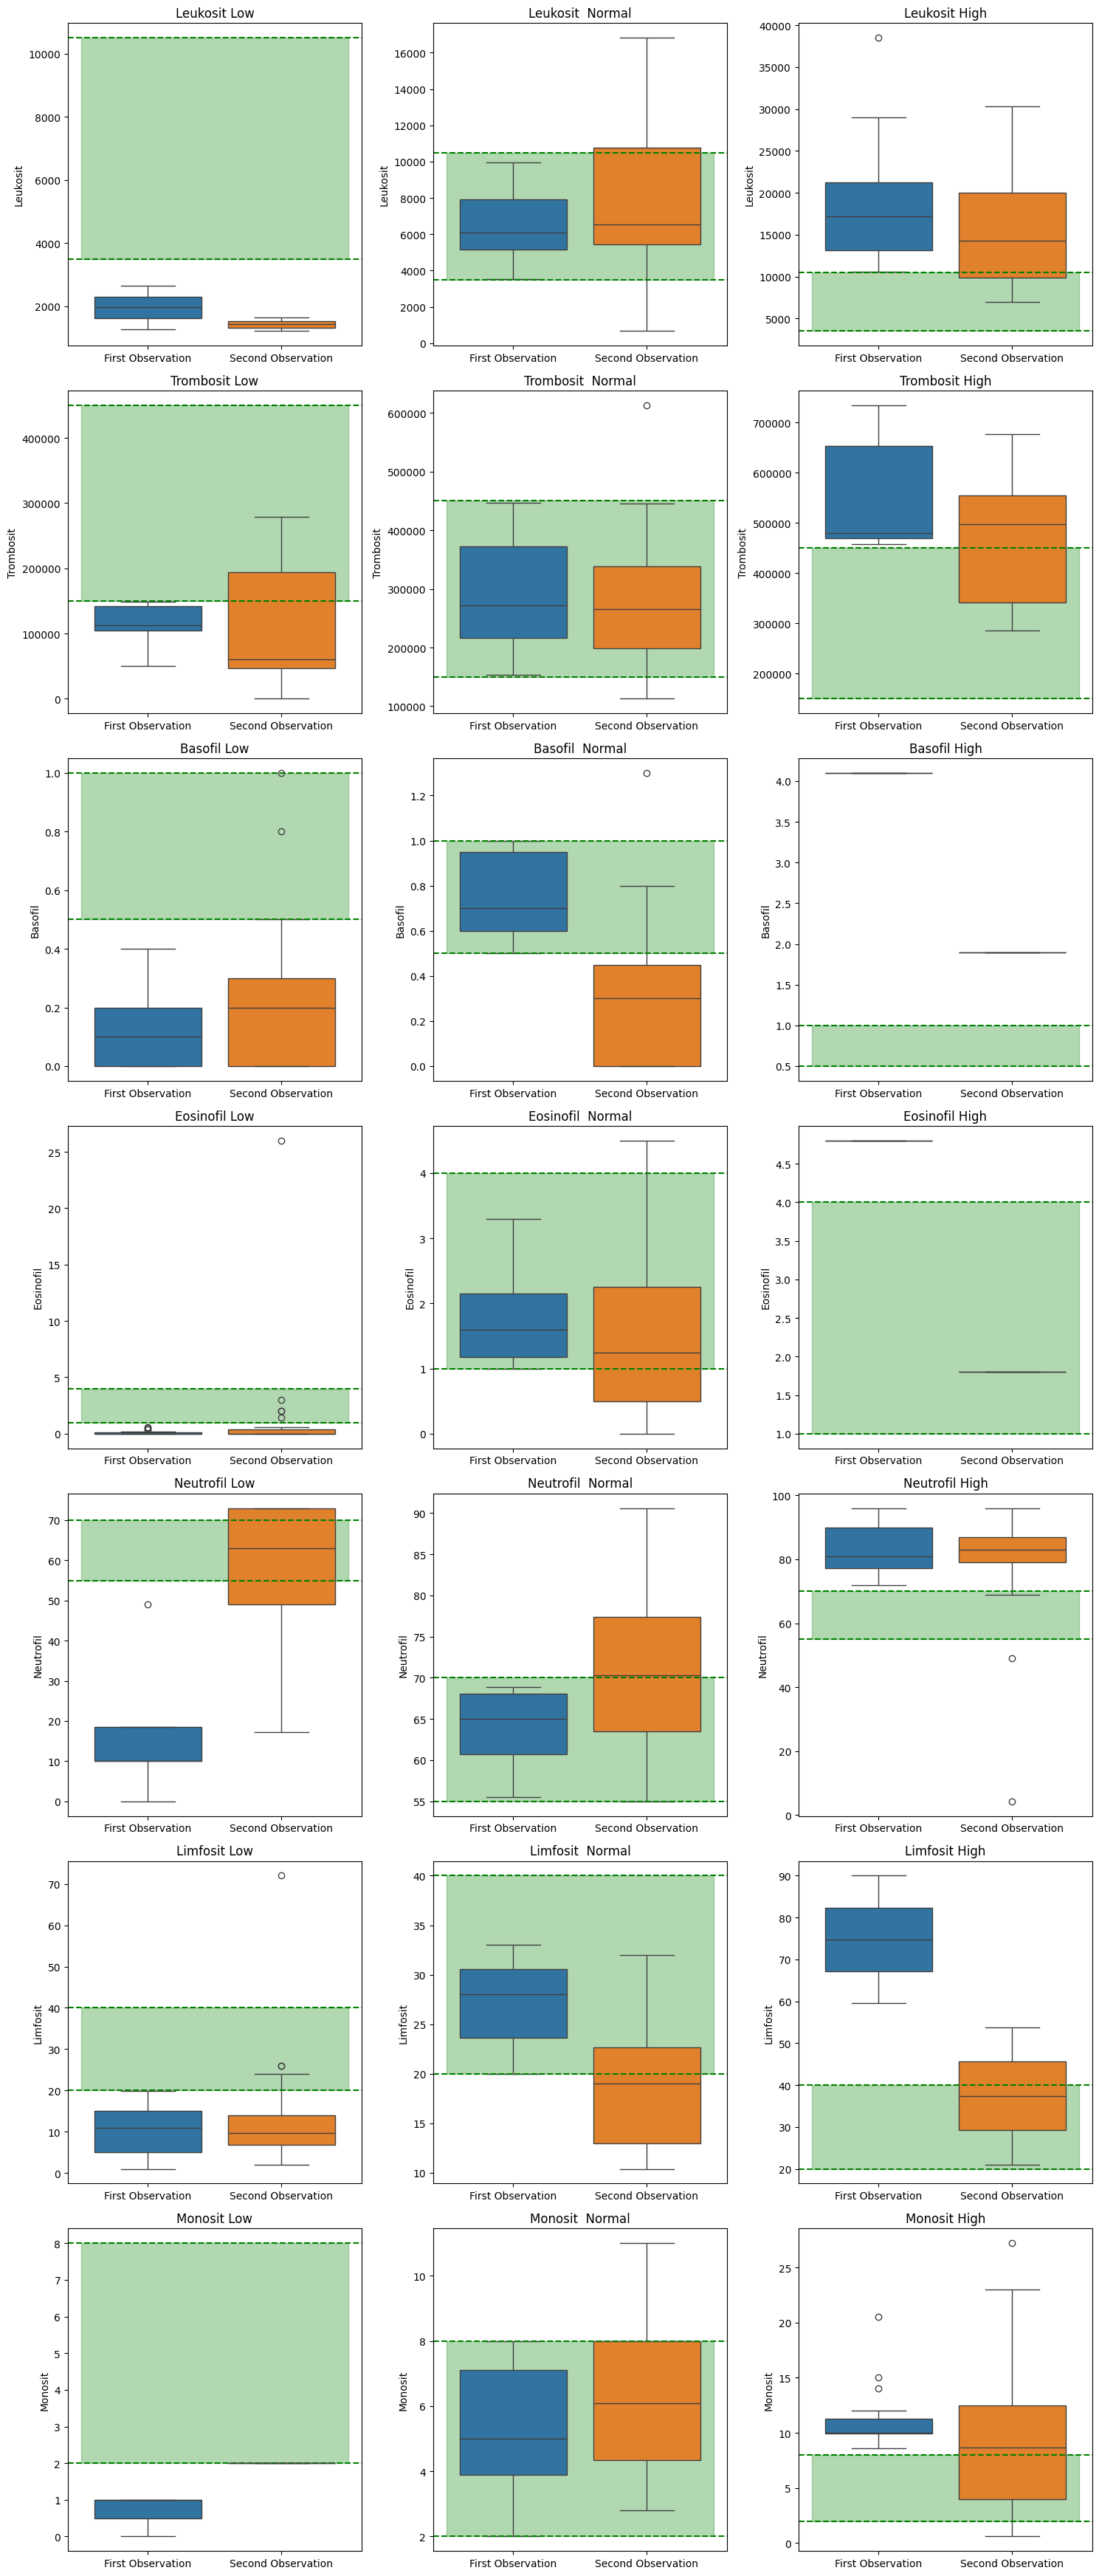

In [ ]:
import seaborn as sns

# Back up original data and using only complete data from first and second observation
df3 = df1.copy()
df1.dropna(subset=['Basofil_2'], inplace=True)

# Define normal ranges for each variable
ranges = {
    'Leukosit': (3500, 10500),
    'Trombosit': (150000, 450000),
    'Basofil': (0.5, 1),
    'Eosinofil': (1, 4),
    'Neutrofil': (55, 70),
    'Limfosit': (20, 40),
    'Monosit': (2, 8)
}

# Extracting variable names
variables = list(ranges.keys())

# Creating lists to store dataframes for each category
low_dfs = []
normal_dfs = []
high_dfs = []

# Looping through each variable and creating separate dataframes for each category
for var in variables:
    # Extracting relevant columns for the current variable
    df_var = df1[[f'{var}_1', f'{var}_2']]
    df_cat = df1[f'CAT_{var}_1']

    # Looping through each category and filtering data
    for cat in ['Low', 'Normal', 'High']:
        cat_df = df_var[df_cat == cat]

        # Appending the category dataframe to the corresponding list
        if cat == 'Low':
            low_dfs.append(cat_df)
        elif cat == 'Normal':
            normal_dfs.append(cat_df)
        else:
            high_dfs.append(cat_df)

# Creating boxplots
fig, axes = plt.subplots(len(variables), 3, figsize=(15, 5*len(variables)))

for i, (low_df, normal_df, high_df, var) in enumerate(zip(low_dfs, normal_dfs, high_dfs, variables)):
    # Concatenating dataframes for each category
    data_low = pd.concat([low_df[f'{var}_1'], low_df[f'{var}_2']], axis=1)
    data_normal = pd.concat([normal_df[f'{var}_1'], normal_df[f'{var}_2']], axis=1)
    data_high = pd.concat([high_df[f'{var}_1'], high_df[f'{var}_2']], axis=1)

    # Plotting boxplots for each category
    sns.boxplot(data=data_low, ax=axes[i, 0])
    axes[i, 0].set_title(f'{var} Low')
    axes[i, 0].set_ylabel(var)
    axes[i, 0].axhline(y=ranges[var][0], color='green', linestyle='--')
    axes[i, 0].axhline(y=ranges[var][1], color='green', linestyle='--')
    axes[i, 0].fill_between(x=[-0.5, 1.5], y1=ranges[var][0], y2=ranges[var][1], color='green', alpha=0.3)

    sns.boxplot(data=data_normal, ax=axes[i, 1])
    axes[i, 1].set_title(f'{var}  Normal')
    axes[i, 1].set_ylabel(var)
    axes[i, 1].axhline(y=ranges[var][0], color='green', linestyle='--')
    axes[i, 1].axhline(y=ranges[var][1], color='green', linestyle='--')
    axes[i, 1].fill_between(x=[-0.5, 1.5], y1=ranges[var][0], y2=ranges[var][1], color='green', alpha=0.3)

    sns.boxplot(data=data_high, ax=axes[i, 2])
    axes[i, 2].set_title(f'{var} High')
    axes[i, 2].set_ylabel(var)
    axes[i, 2].axhline(y=ranges[var][0], color='green', linestyle='--')
    axes[i, 2].axhline(y=ranges[var][1], color='green', linestyle='--')
    axes[i, 2].fill_between(x=[-0.5, 1.5], y1=ranges[var][0], y2=ranges[var][1], color='green', alpha=0.3)

# Set x-axis labels
for ax in axes.flat:
    ax.set_xticklabels(['First Observation', 'Second Observation'])

plt.tight_layout()
plt.show()

Dari beberapa visualisasi diatas, informasi yang didapatkan adalah sebagai berikut:

1. Nilai leukosit cenderung berada pada kategori yang sama baik pada pemeriksaan pertama dan kedua (gagal menormalkan "High" dan "Low" tapi berhasil mempertahankan yang sudah "Normal").
2. Hanya sebagian kecil nilai trombosit yang awalnya berada pada "Low" dan "High" (berhasil) menjadi "Normal".
3. Sebagian besar nilai basofil yang awalnya bernilai "Normal" menjadi "Low". (gagal)
4. Sekitar seperempat nilai eosinofil yang awalnya bernilai "Normal" menjadi "Low" (gagal), dan semua eosinofil yang awalnya "High" (berhasil) menjadi "Normal" dengan range nilai yang sangat kecil.
5. Sekitar setengah nilai neutrofil yang "Low" (berhasil) menjadi "Normal" dengan rentang nilai yang lebih besar, dan setengah neutrofil yang awalnya normal menjadi "High" (gagal)
6. Setengah limfosit yang awalnya "Normal" menjadi "Low", dan lebih dari setengah yang awalnya "High" menjadi "Normal" (berhasil).
7. Semua yang awalnya monosit bernilai "Low" hampir (berhasil) menjangkau nilai ambang batas bawah "Normal", dan kurang dari setengah pasien dengan nilai "High" (berhasil) menjadi "Normal" dengan rentang nilai yang lebih besar.
8. Sisanya tetap berada kondisi yang sama baik dengan kategori "High", "Low" (gagal) dan "Normal" (berhasil)

### Kategorik vs Kategorik
---
Pada visualisasi boxplot sebelumnya, walaupun kita dapat melihat distribusi dari data. Membutuhkan waktu lebih lama untuk mengerti maksud dari sekian banyaknya visualisasi. Maka dari itu dapat digunakan 100% stacked bar chart agar visualisasi lebih *compact*.

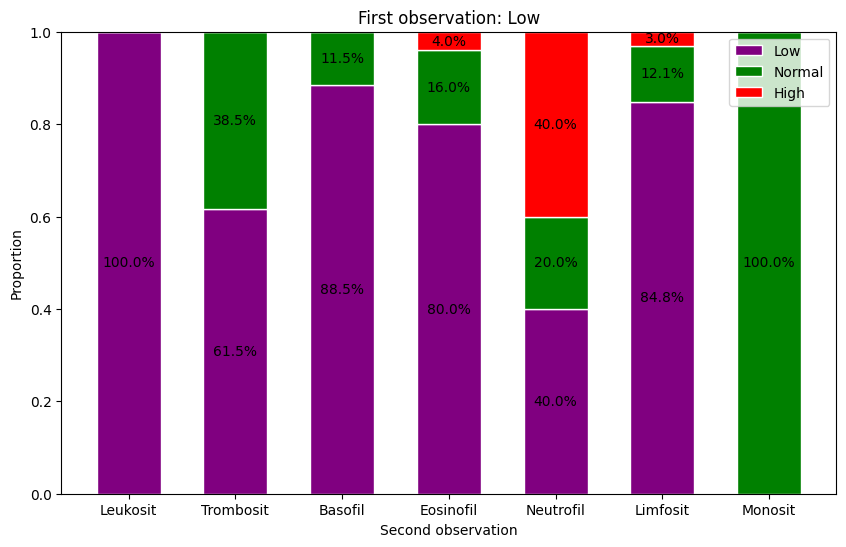

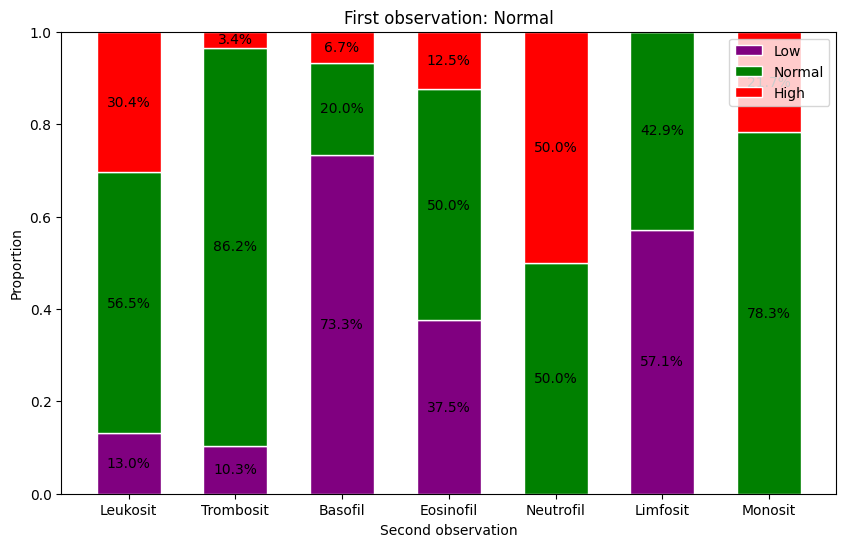

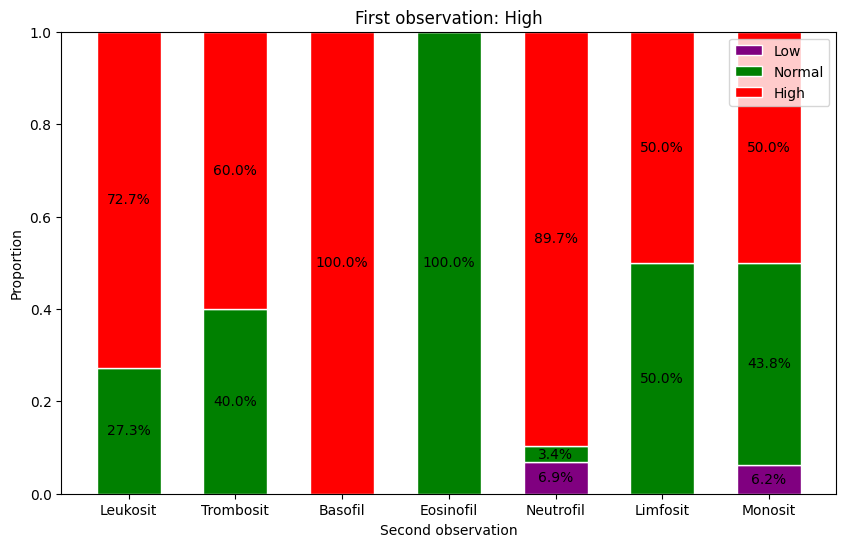

In [ ]:
# List of categories
categories = ['Leukosit', 'Trombosit', 'Basofil', 'Eosinofil', 'Neutrofil', 'Limfosit', 'Monosit']

# Colors for the categories
colors = {'Low': 'purple', 'Normal': 'green', 'High': 'red'}

# Initialize a dictionary to hold the counts
counts = {'Low': [], 'Normal': [], 'High': []}

for condition in ['Low', 'Normal', 'High']:
    for cat in categories:
        # Filter the data where the first observation is the current condition
        filtered_data = df1[df1['CAT_'+cat+'_1'] == condition]

        # Count the categories in the second observation
        counts_2 = filtered_data['CAT_'+cat+'_2'].value_counts()

        total = sum(counts_2.values)
        if total != 0:  # Add this conditional statement
            counts[condition].append([counts_2.get('Low', 0)/total, counts_2.get('Normal', 0)/total, counts_2.get('High', 0)/total])

# Create 100% stacked bar plot for each condition in the first observation
bar_width = 0.6
r = np.arange(len(categories))

for condition in ['Low', 'Normal', 'High']:
    plt.figure(figsize=(10, 6))
    bar1 = plt.bar(r[:len(counts[condition])], [c[0] for c in counts[condition]], color='purple', width=bar_width, edgecolor='white', label='Low')
    bar2 = plt.bar(r[:len(counts[condition])], [c[1] for c in counts[condition]], bottom=[c[0] for c in counts[condition]], color='green', width=bar_width, edgecolor='white', label='Normal')
    bar3 = plt.bar(r[:len(counts[condition])], [c[2] for c in counts[condition]], bottom=[c[0]+c[1] for c in counts[condition]], color='red', width=bar_width, edgecolor='white', label='High')

    # Add percentages on each bar
    bars = [bar1, bar2, bar3]
    for bars in bars:
        for bar in bars:
            yval = bar.get_height()
            if yval != 0:  # Skip displaying the value when percentage is 0%
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_y() + yval/2, f"{round(yval*100, 1)}%", ha='center', va='center')

    plt.title(f'First observation: {condition}')
    plt.xlabel('Second observation')
    plt.ylabel('Proportion')
    plt.xticks([r for r in range(len(categories))][:len(counts[condition])], categories[:len(counts[condition])])
    plt.legend()
    plt.show()

Dari visualisasi ini diperoleh informasi:

1. Perubahan data dari nilai "Low" menjadi lainnya terdapat cukup banyak pada neutrofil dan monosit.
2. Perubahan data dari nilai "Normal" menjadi lainnya cukup banyak terdapat pada basofil, eosinofil, neutrofil dan limfosit.
3. Perubahan data dari nilai "High" menjadi lainnya cukup banyak terdapat pada Eosinofil, limfosit, dan monosit.
4. Akan tetapi secara umum, nilai "High" dan "Low" pada pemeriksaan pertama cenderung berada pada kategori ordinal yang sama dengan pemeriksaan kedua. Sehingga kebanyakan dari kondisi pasien tidak bisa dikatakan membaik walaupun sudah mendapatkan perawatan jika merujuk pada dua pemeriksaan awal lab DPL dan DC.
5. Hal ini juga berlaku pada 4 nilai "Normal" pada pemeriksaan pertama yang banyak bergeser menjadi nilai "abnormal", menandakan beberapa pasien keadaannya memburuk ketika mendapatkan perawatan.

Selain itu akan dilihat jumlah pasien perbulan dengan perbandingan status covid dan tipe kamar.

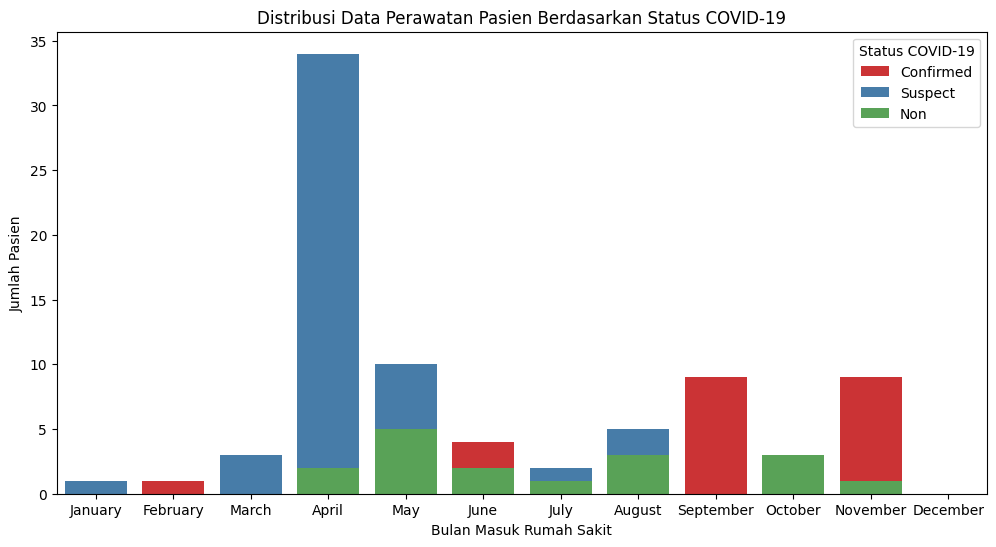

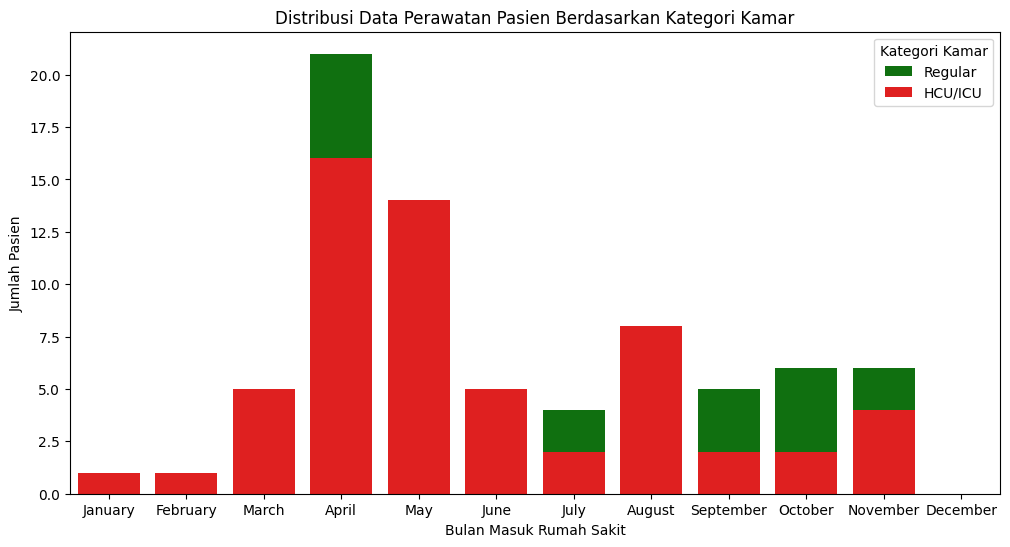

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df3, x='MRS_MONTH', hue='COV_STATUS', palette='Set1', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], dodge=False)
plt.title('Distribusi Data Perawatan Pasien Berdasarkan Status COVID-19')
plt.xlabel('Bulan Masuk Rumah Sakit')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Status COVID-19', loc='upper right')
plt.show()

df3['Room_Category'] = df3['Room_Type'].replace({'HCU': 'HCU/ICU', 'ICU': 'HCU/ICU'})

plt.figure(figsize=(12, 6))
sns.countplot(data=df3, x='MRS_MONTH', hue='Room_Category', palette={'Regular': 'green', 'HCU/ICU':'red'}, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], dodge=False)
plt.title('Distribusi Data Perawatan Pasien Berdasarkan Kategori Kamar')
plt.xlabel('Bulan Masuk Rumah Sakit')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Kategori Kamar', loc='upper right')
plt.show()

Berdasarkan 2 visualisasi diatas dapat diambil informasi:

1. Dari data yang ada, jumlah pasien terbanyak terdapat pada bulan april.
2. Pasien didominasi oleh status "Suspect".
3. Tipe ruangan yang paling sering dipakai adalah HCU/ICU.
4. Bulan januari, februari, maret, mei, juni dan agustus semua pasien menggunakan ruangan HCU/ICU dimana perawatan yang diberikan lebih intensif. akan tetapi, pasien dengan status "Confirmed" dari bulan yang disebutkan hanya terdapat pada bulan februari dan juni dengan jumlah yang sangat sedikit. Terdapat indikasi pada rentang januari sampai agustus, HCU/ICU di dominasi oleh pasien dengan status "Suspect" atau "Non".
5. Sedangkan pada bulan september sampai november, pasien dengan status "Confirmed" mendominasi, dengan pembagian ruangan Intensif dan regular yang lebih merata. Perlu analisis lebih lanjut kenapa terjadi perbedaan *treatment* ruangan pasien pada rentang januari-agustus dan september-november.